In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17137228948089178587
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4496988918482142170
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariklolik","key":"18c06a34a9c5aa8af8d7724e36fea480"}'}

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:01<00:00, 93.5MB/s]
100% 163M/163M [00:01<00:00, 102MB/s] 


In [ ]:
!unzip 'face-mask-dataset.zip'

In [36]:
#По 3725 фото в каждой папке
for i in os.walk('/content/data/without_mask'):
  for j in i:
    for x in j:
      if len(x.split('_')) == 3:
        if int(x.split('_')[-1].split('.')[0]) > 3725:
          print(f"/content/data/without_mask/{x}")
          os.remove(f'/content/data/without_mask/{x}')

In [67]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
import os
import numpy as np

In [38]:
size_1, size_2 = 300, 300

In [47]:
#!rm -R bottleneck_features

In [216]:
img = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input, validation_split=0.2)
data_train = img.flow_from_directory('/content/data', target_size=(size_1, size_2), batch_size=32, class_mode='binary',
                                        shuffle=True, subset='training')
data_val = img.flow_from_directory('/content/data', target_size=(size_1, size_2), batch_size=32, class_mode='binary',
                                        shuffle=True, subset='validation')

Found 5960 images belonging to 2 classes.
Found 1490 images belonging to 2 classes.


In [217]:
inc_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(size_1, size_2, 3))

In [218]:
for i in inc_model.layers:
  i.trainable = False

In [219]:
a1, b1, c1, d1 = inc_model.predict(data_train[1][0]).shape

In [220]:
fc_model=Sequential()
fc_model.add(Flatten(input_shape=(b1, c1, d1)))
fc_model.add(Dense(64, activation='relu', name='dense_one'))
#fc_model.add(Dropout(0.5, name='dropout_one'))
fc_model.add(Dense(64, activation='relu', name='dense_two'))
#fc_model.add(Dropout(0.5, name='dropout_two'))
fc_model.add(Dense(1, activation='sigmoid', name='output'))


In [221]:
model = Sequential()
model.add(inc_model)
model.add(fc_model)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [222]:
history = model.fit(data_train, epochs=6, batch_size=32, validation_data=data_val)

Epoch 1/6
  6/187 [..............................] - ETA: 29s - loss: 2.2404 - accuracy: 0.5808

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


187/187 [==============================] - 41s 200ms/step - loss: 0.5047 - accuracy: 0.9374 - val_loss: 0.0716 - val_accuracy: 0.9953
Epoch 2/6
187/187 [==============================] - 37s 195ms/step - loss: 0.0390 - accuracy: 0.9933 - val_loss: 0.0991 - val_accuracy: 0.9899
Epoch 3/6
187/187 [==============================] - 36s 194ms/step - loss: 0.0211 - accuracy: 0.9971 - val_loss: 0.0359 - val_accuracy: 0.9946
Epoch 4/6
  6/187 [..............................] - ETA: 25s - loss: 3.9158e-08 - accuracy: 1.0000

KeyboardInterrupt: ignored

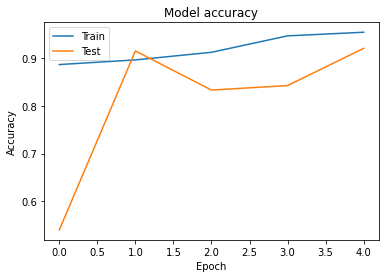

In [223]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



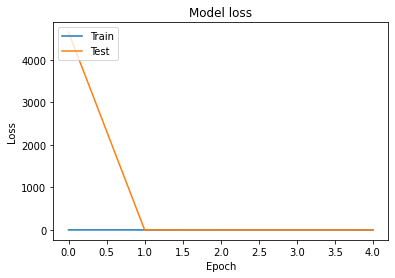

In [224]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [225]:
import keras
import tensorflow as tf


In [241]:
import numpy as np
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions


image = tf.keras.preprocessing.image.load_img('test17.jpg', target_size=(300, 300))
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = keras.applications.inception_v3.preprocess_input(np.array([input_arr]))  # Convert single image to a batch.
predictions = model.predict(input_arr)
predictions

array([[2.913907e-14]], dtype=float32)

In [242]:
model.save('best_best_best_final_best.hdf5')